In [43]:
#loading data
import pandas as pd
import numpy as np
import seaborn as sns
aisles = pd.read_csv('aisles.csv')
departments = pd.read_csv('departments.csv')
prior = pd.read_csv('order_products__prior.csv')
train = pd.read_csv('order_products__train.csv')
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')

In [44]:
# create merged dataframe of all orders

all_orders = pd.concat([prior,train],axis = 0)
all_orders = all_orders.merge(products[['product_id','aisle_id','department_id']], how = 'inner', on = 'product_id')
all_orders = all_orders.merge(aisles, on = 'aisle_id')
all_orders = all_orders.merge(departments, on = 'department_id')
all_orders = all_orders.merge(orders[['order_id','user_id','order_hour_of_day']], on = 'order_id')
all_orders = all_orders.merge(products[['product_id','product_name']], on = 'product_id')

In [45]:
all_orders = all_orders[['order_id','add_to_cart_order','reordered','order_hour_of_day','product_id','product_name','aisle_id','aisle','department_id','department','user_id']]
all_orders.head()

,order_id,add_to_cart_order,reordered,order_hour_of_day,product_id,product_name,aisle_id,aisle,department_id,department,user_id
0,2,1,1,9,33120,Organic Egg Whites,86,eggs,16,dairy eggs,202279
1,26,5,0,16,33120,Organic Egg Whites,86,eggs,16,dairy eggs,153404
2,120,13,0,8,33120,Organic Egg Whites,86,eggs,16,dairy eggs,23750
3,327,5,1,9,33120,Organic Egg Whites,86,eggs,16,dairy eggs,58707
4,390,28,1,12,33120,Organic Egg Whites,86,eggs,16,dairy eggs,166654


In [46]:
print(str(len(all_orders.user_id.unique())) +' customers')
print(str(len(all_orders.order_id.unique())) +' order')
print(str(len(all_orders.aisle_id.unique())) +' aisles')
print(str(len(all_orders.product_id.unique())) +' products')

206209 customers
3346083 order
134 aisles
49685 products


[Text(0.5, 0, 'Department'), Text(0, 0.5, 'Units Ordered')]

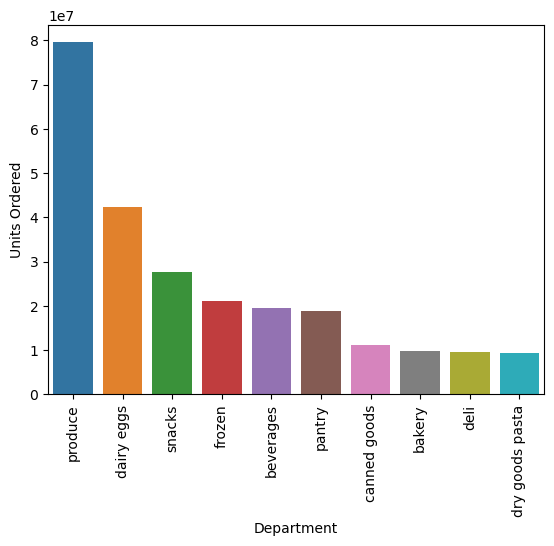

In [47]:
# most popular departments in terms of units ordered

x = sns.barplot(data = all_orders.groupby('department')['add_to_cart_order'].sum().sort_values(ascending = False).reset_index()[0:10], x = 'department', y = 'add_to_cart_order')
x.set_xticklabels(x.get_xticklabels(), rotation = 90)
x.set(xlabel = 'Department', ylabel = 'Units Ordered')

In [48]:
selected_products = all_orders[all_orders['department'] == 'produce']['product_name'].unique()
selected_products

array(['Michigan Organic Kale', 'Carrots', 'Classic Blend Cole Slaw', ...,
       'Pinata Apple', 'Juicing Carrots',
       'Organic Honey Bunch Grape Tomatoes'], dtype=object)

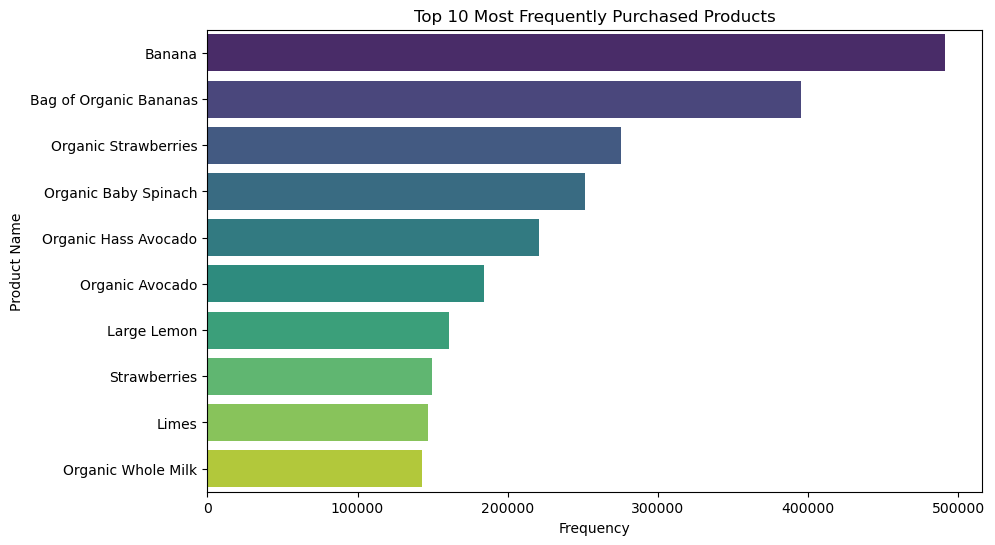

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
# Most frequently purchased products
product_popularity = all_orders['product_name'].value_counts().head(10)
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=product_popularity.values, y=product_popularity.index, palette='viridis')
plt.title('Top 10 Most Frequently Purchased Products')
plt.xlabel('Frequency')
plt.ylabel('Product Name')
plt.show()

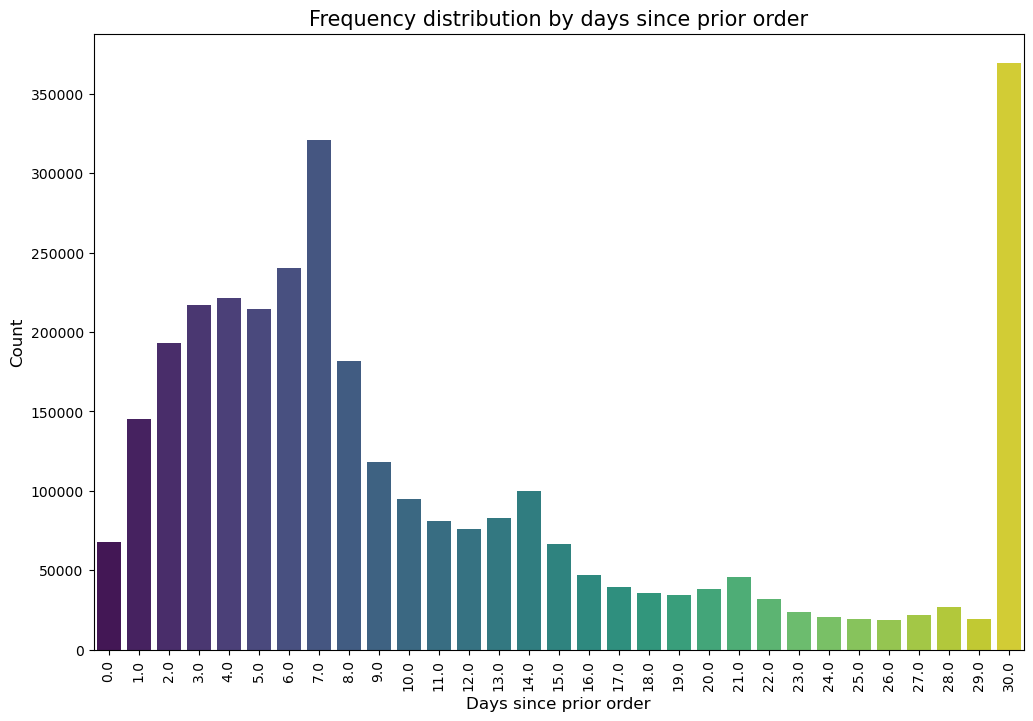

In [66]:
# distplot for time between orders
plt.figure(figsize=(12,8))
sns.countplot(x="days_since_prior_order", data=orders, palette='viridis')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Days since prior order', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency distribution by days since prior order", fontsize=15)
plt.show()

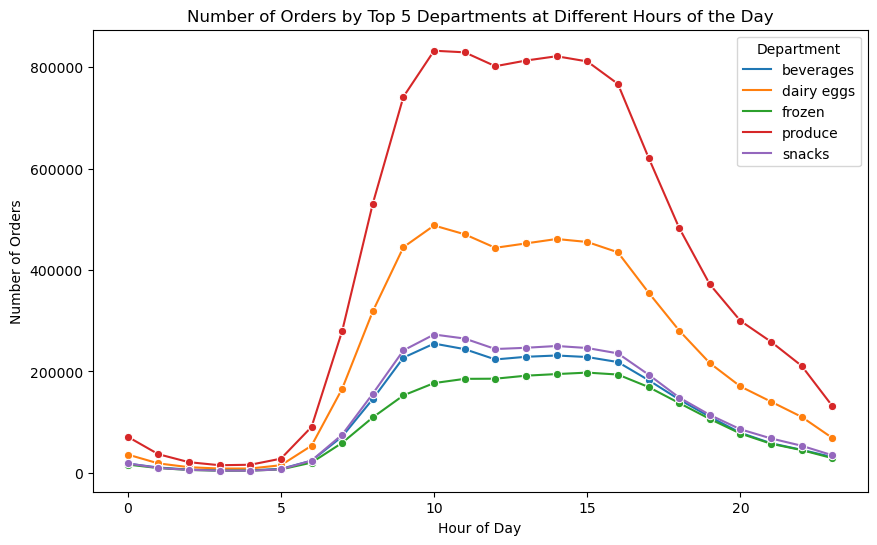

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'order_hour_of_day' and 'department' are columns in your DataFrame
# Group by hour_of_day and department, and then count the number of orders
orders_by_hour_department = all_orders.groupby(['order_hour_of_day', 'department']).size().reset_index(name='order_count')

# Rank departments within each hour based on order_count
orders_by_hour_department['rank'] = orders_by_hour_department.groupby('order_hour_of_day')['order_count'].rank(ascending=False, method='first')

# Select only the top 5 departments for each hour
top_departments_by_hour = orders_by_hour_department[orders_by_hour_department['rank'] <= 5]

# Create a line plot with lines connecting points for each department
plt.figure(figsize=(10, 6))
sns.lineplot(x='order_hour_of_day', y='order_count', hue='department', data=top_departments_by_hour, marker='o')
plt.title('Number of Orders by Top 5 Departments at Different Hours of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.legend(title='Department')
plt.show()


/var/folders/x_/4jbjgtwd0_d62lts4ntgyd6r0000gn/T/ipykernel_11215/131823564.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'order_number')


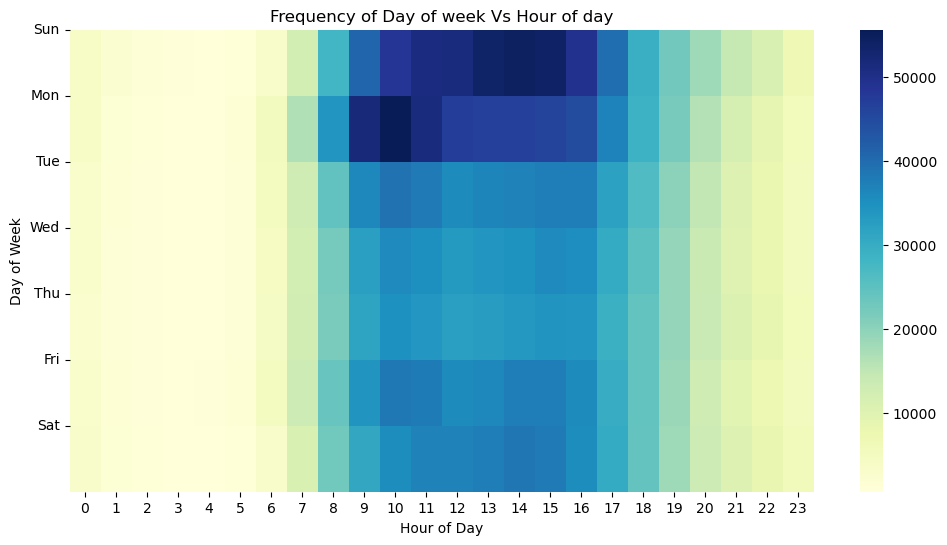

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'order_dow' and 'order_hour_of_day' are columns in your DataFrame
grouped_df = orders.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'order_number')

# Define day labels
day_labels = ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]

plt.figure(figsize=(12, 6))
sns.heatmap(grouped_df, cmap="YlGnBu")  # You can choose a different colormap if needed
plt.title("Frequency of Day of week Vs Hour of day")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")

# Set y-tick labels
plt.yticks(range(len(day_labels)), day_labels, rotation=0)

plt.show()


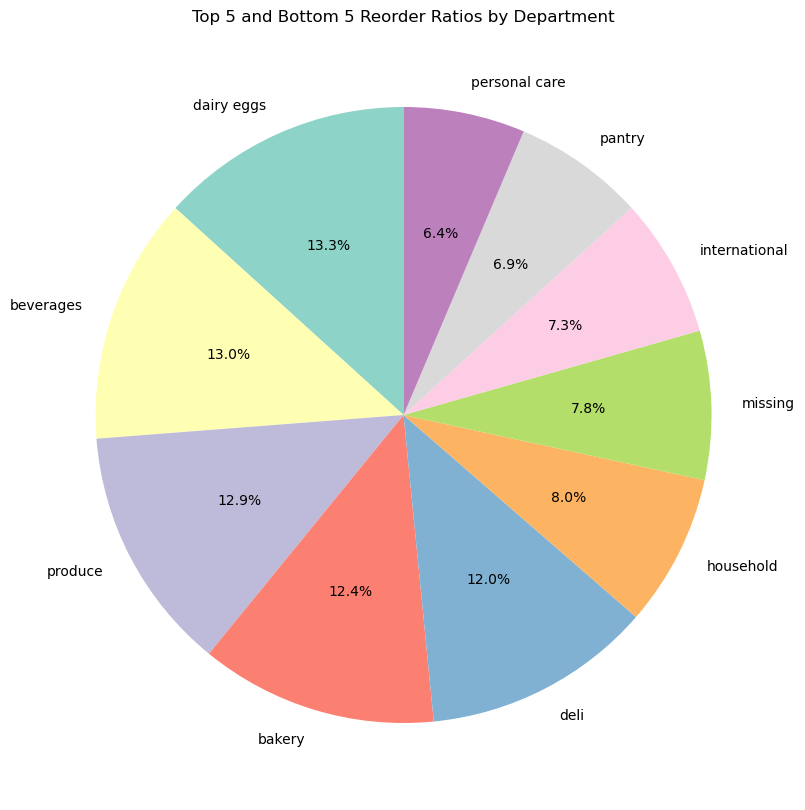

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'department' and 'reordered' are columns in your DataFrame
grouped_df = all_orders.groupby(["department"])["reordered"].mean().reset_index()

# Sort by reorder ratio in descending order
sorted_departments = grouped_df.sort_values(by='reordered', ascending=False)

# Select the top 5 and bottom 5 departments
top5_departments = sorted_departments.head(5)
bottom5_departments = sorted_departments.tail(5)

# Combine top 5 and bottom 5 for the pie chart
combined_departments = pd.concat([top5_departments, bottom5_departments])

plt.figure(figsize=(10, 10))
plt.pie(combined_departments['reordered'], labels=combined_departments['department'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Set3.colors)
plt.title('Top 5 and Bottom 5 Reorder Ratios by Department')
plt.show()


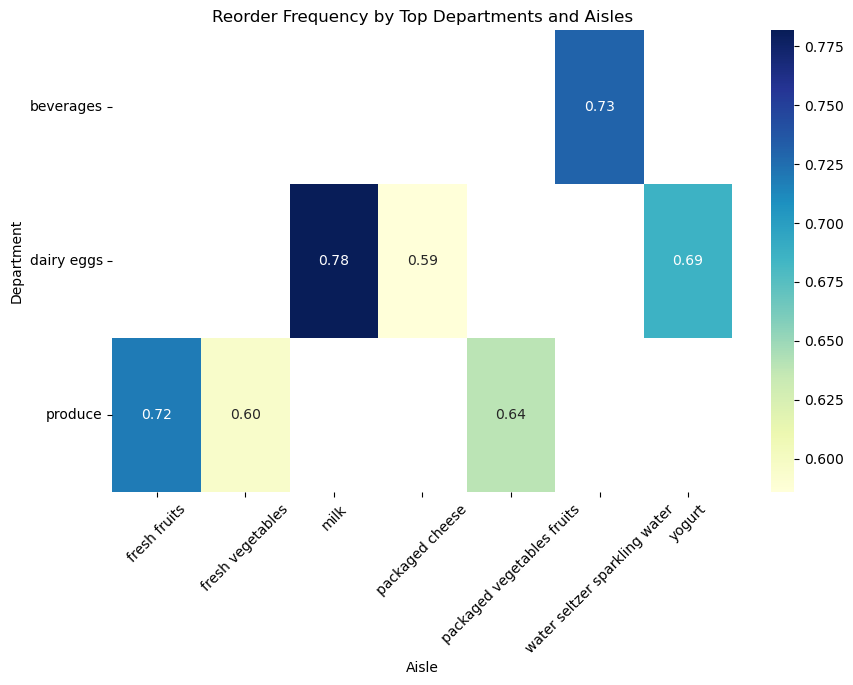

In [67]:
# Finding the top 5 most popular departments and aisles
top_departments = all_orders['department'].value_counts().head(7).index
top_aisles = all_orders['aisle'].value_counts().head(7).index
# Filtering the data
filtered_data = all_orders[all_orders['department'].isin(top_departments) & all_orders['aisle'].isin(top_aisles)]
# Calculating reorder rates for each department and aisle combination within the filtered data
filtered_dept_aisle_reorder = filtered_data.groupby(['department', 'aisle'])['reordered'].mean().unstack()
# Plotting with heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(filtered_dept_aisle_reorder, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Reorder Frequency by Top Departments and Aisles')
plt.xlabel('Aisle')
plt.ylabel('Department')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

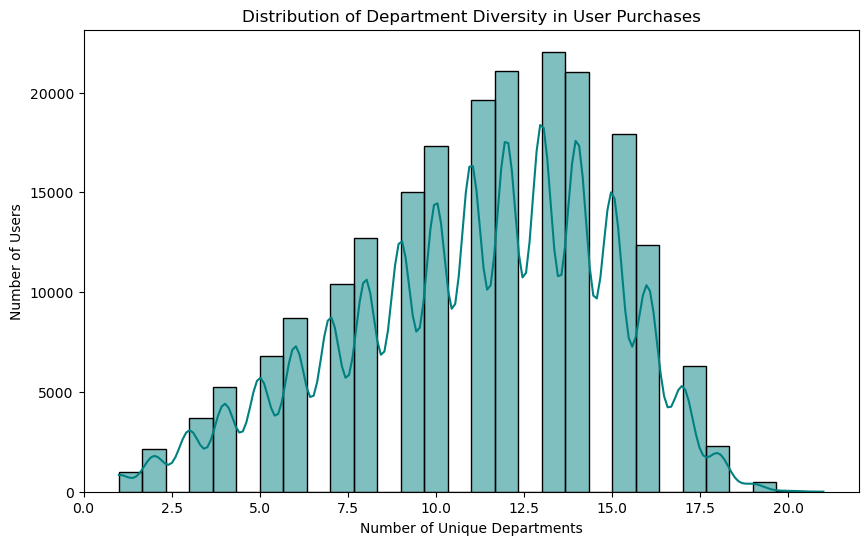

In [68]:
# Calculating the number of unique departments per user
user_dept_diversity = all_orders.groupby('user_id')['department'].nunique()
# Plotting the distribution
plt.figure(figsize=(10, 6))
sns.histplot(user_dept_diversity, bins=30, kde=True, color='teal')
plt.title('Distribution of Department Diversity in User Purchases')
plt.xlabel('Number of Unique Departments')
plt.ylabel('Number of Users')
plt.show()

# PCA

In [106]:
# These lines create two DataFrames (aisle_hist and dept_hist) that summarize how many items each user added to their cart from each aisle and department.
aisle_hist = all_orders[['user_id','add_to_cart_order','aisle']].groupby(['user_id','aisle']).sum().reset_index()
dept_hist = all_orders[['user_id','add_to_cart_order','department']].groupby(['user_id','department']).sum().reset_index()

In [107]:
# This calculates the total number of items each user has added to their cart (across all aisles) and renames the sum to volume.
user_volume = aisle_hist.groupby('user_id')['add_to_cart_order'].sum()
user_volume = user_volume.reset_index().rename(columns = {'add_to_cart_order':'volume'})
aisle_hist = aisle_hist.merge(user_volume, how = 'inner', on = 'user_id')
dept_hist = dept_hist.merge(user_volume, how = 'inner', on = 'user_id')

In [108]:
#These lines create two DataFrames (aisle_hist and dept_hist) that summarize how many items each user added to their cart from each aisle and department.
aisle_hist['aisle_share'] = aisle_hist['add_to_cart_order'] / aisle_hist['volume']
dept_hist['dept_share'] = dept_hist['add_to_cart_order'] / dept_hist['volume']

In [109]:
# Here, the code calculates the share of each aisle and department in the total cart volume for each user.
aisle_vol_pivot = aisle_hist[['user_id','aisle','add_to_cart_order']].pivot(index = 'user_id', columns = 'aisle', values = 'add_to_cart_order')
aisle_share_pivot = aisle_hist[['user_id','aisle','aisle_share']].pivot(index = 'user_id', columns = 'aisle', values = 'aisle_share')
dept_vol_pivot = dept_hist[['user_id','department','add_to_cart_order']].pivot(index = 'user_id', columns = 'department', values = 'add_to_cart_order')
dept_share_pivot = dept_hist[['user_id','department','dept_share']].pivot(index = 'user_id', columns = 'department', values = 'dept_share')

In [110]:
# These lines create pivot tables for both aisle and department data. There are two types of pivots for each: one for volume (add_to_cart_order) and one for share (aisle_share or dept_share).
aisle_vol_pivot = aisle_hist[['user_id','aisle','add_to_cart_order']].pivot(index = 'user_id', columns = 'aisle', values = 'add_to_cart_order')
aisle_share_pivot = aisle_hist[['user_id','aisle','aisle_share']].pivot(index = 'user_id', columns = 'aisle', values = 'aisle_share')
dept_vol_pivot = dept_hist[['user_id','department','add_to_cart_order']].pivot(index = 'user_id', columns = 'department', values = 'add_to_cart_order')
dept_share_pivot = dept_hist[['user_id','department','dept_share']].pivot(index = 'user_id', columns = 'department', values = 'dept_share')
aisle_vol_pivot = aisle_vol_pivot.fillna(value = 0)
aisle_share_pivot = aisle_share_pivot.fillna(value = 0)
dept_vol_pivot = dept_vol_pivot.fillna(value = 0)
dept_share_pivot = dept_share_pivot.fillna(value = 0)

In [111]:
all_orders

,order_id,add_to_cart_order,reordered,order_hour_of_day,product_id,product_name,aisle_id,aisle,department_id,department,user_id
0,2,1,1,9,33120,Organic Egg Whites,86,eggs,16,dairy eggs,202279
1,26,5,0,16,33120,Organic Egg Whites,86,eggs,16,dairy eggs,153404
2,120,13,0,8,33120,Organic Egg Whites,86,eggs,16,dairy eggs,23750
3,327,5,1,9,33120,Organic Egg Whites,86,eggs,16,dairy eggs,58707
4,390,28,1,12,33120,Organic Egg Whites,86,eggs,16,dairy eggs,166654
...,...,...,...,...,...,...,...,...,...,...,...
33819101,1630750,2,1,9,34081,Peach Black Tea,94,tea,7,beverages,16884
33819102,3229668,9,0,15,31465,Imported Stout Draught Style,27,beers coolers,5,alcohol,41154
33819103,1622849,1,0,11,45509,Amaretto Almond Crunch Ice Cream,37,ice cream ice,1,frozen,119951
33819104,2589416,4,0,23,45509,Amaretto Almond Crunch Ice Cream,37,ice cream ice,1,frozen,17724


In [112]:
prior

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1


In [113]:
aisle_share_pivot

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.0,...,0.017857,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.0,0.025000
2,0.00000,0.010628,0.000000,0.0,0.000000,0.0,0.004159,0.00000,0.0,0.0,...,0.023105,0.003235,0.006932,0.000000,0.00000,0.000000,0.0,0.008318,0.0,0.186229
3,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.0,...,0.038363,0.012788,0.000000,0.000000,0.00000,0.000000,0.0,0.028133,0.0,0.000000
4,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.0,...,0.000000,0.000000,0.000000,0.060000,0.00000,0.000000,0.0,0.040000,0.0,0.000000
5,0.02008,0.076305,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.0,0.064257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206205,0.00000,0.000000,0.009828,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.0,0.228501
206206,0.00000,0.021958,0.000000,0.0,0.000000,0.0,0.012809,0.00183,0.0,0.0,...,0.003660,0.000000,0.000000,0.000000,0.00000,0.003660,0.0,0.004575,0.0,0.000000
206207,0.00000,0.000000,0.000000,0.0,0.011862,0.0,0.000000,0.00000,0.0,0.0,...,0.008252,0.022692,0.000000,0.012893,0.00722,0.000000,0.0,0.033522,0.0,0.053120


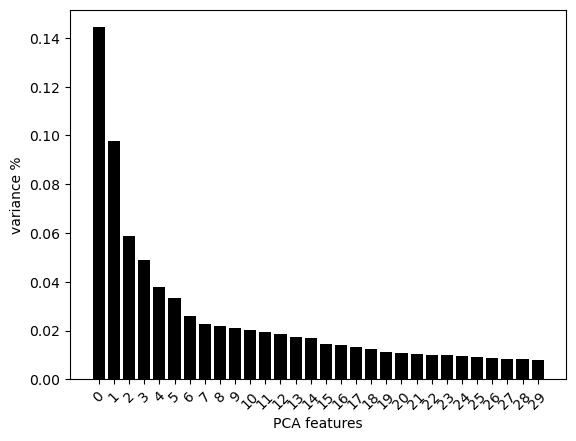

In [114]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components = 30)
principalComponents = pca.fit_transform(aisle_share_pivot)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color = 'black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
plt.xticks(rotation = 45)

PCA_components = pd.DataFrame(principalComponents)

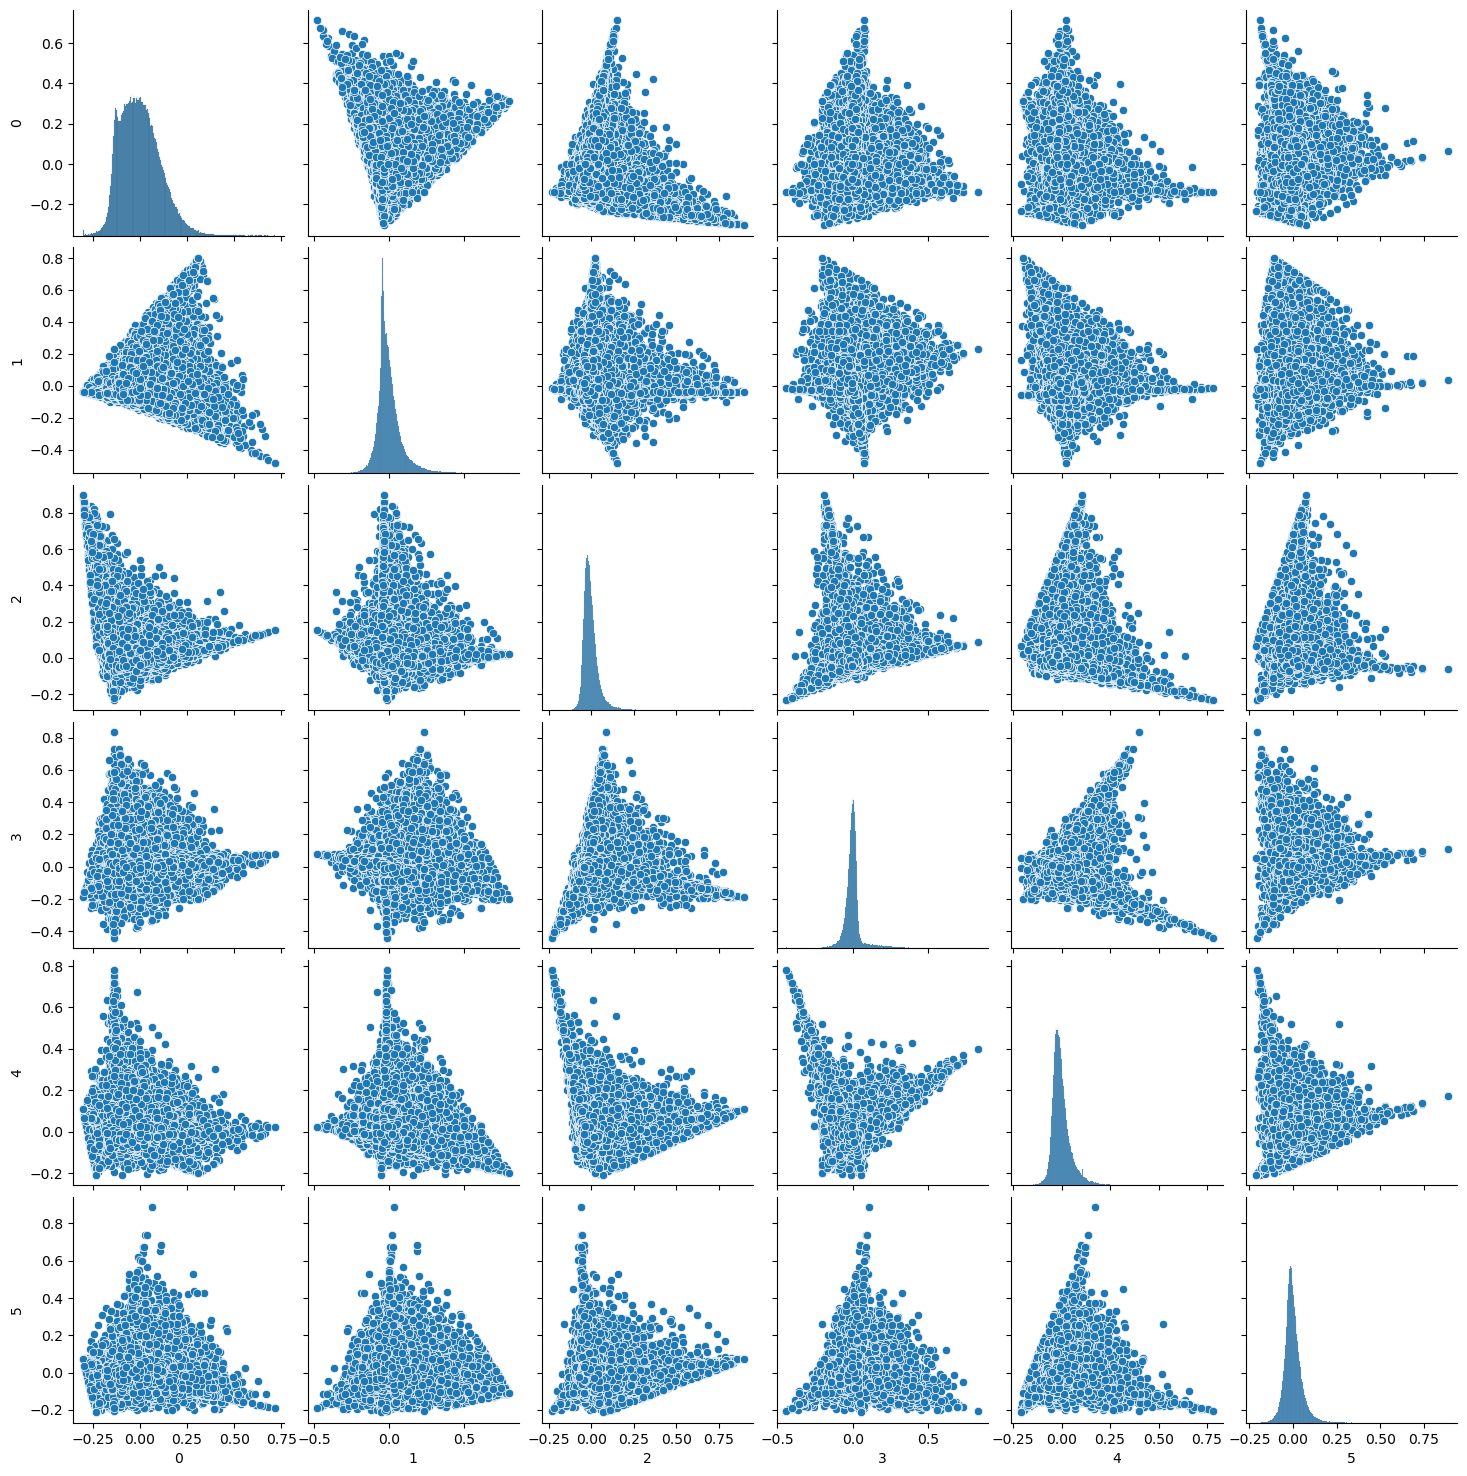

In [115]:
sns.pairplot(PCA_components[[0,1,2,3,4,5]])

# Kmeans

In [116]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

/Users/saiakhil/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/saiakhil/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/saiakhil/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/saiakhil/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/s

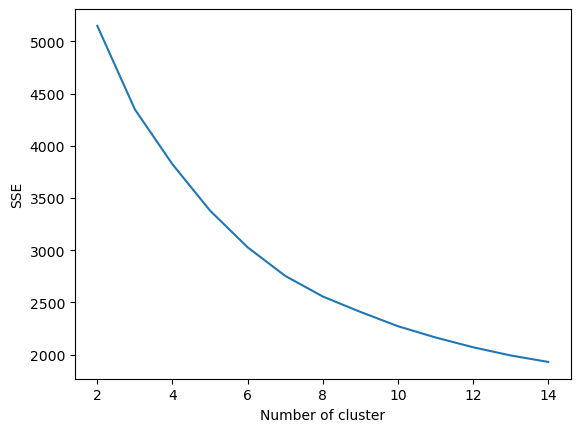

In [117]:
sse = {}
labels = {}
for k in range(2,15):
    kmeans = KMeans(n_clusters = k).fit(PCA_components[[0,1,2,3,4,5]])
    sse[k] = kmeans.inertia_
    labels[k] = kmeans.labels_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [118]:
cluster_df = pd.concat([PCA_components[[0,1,2,3,4,5]],pd.Series(labels[6]).rename('cluster')], axis = 1)

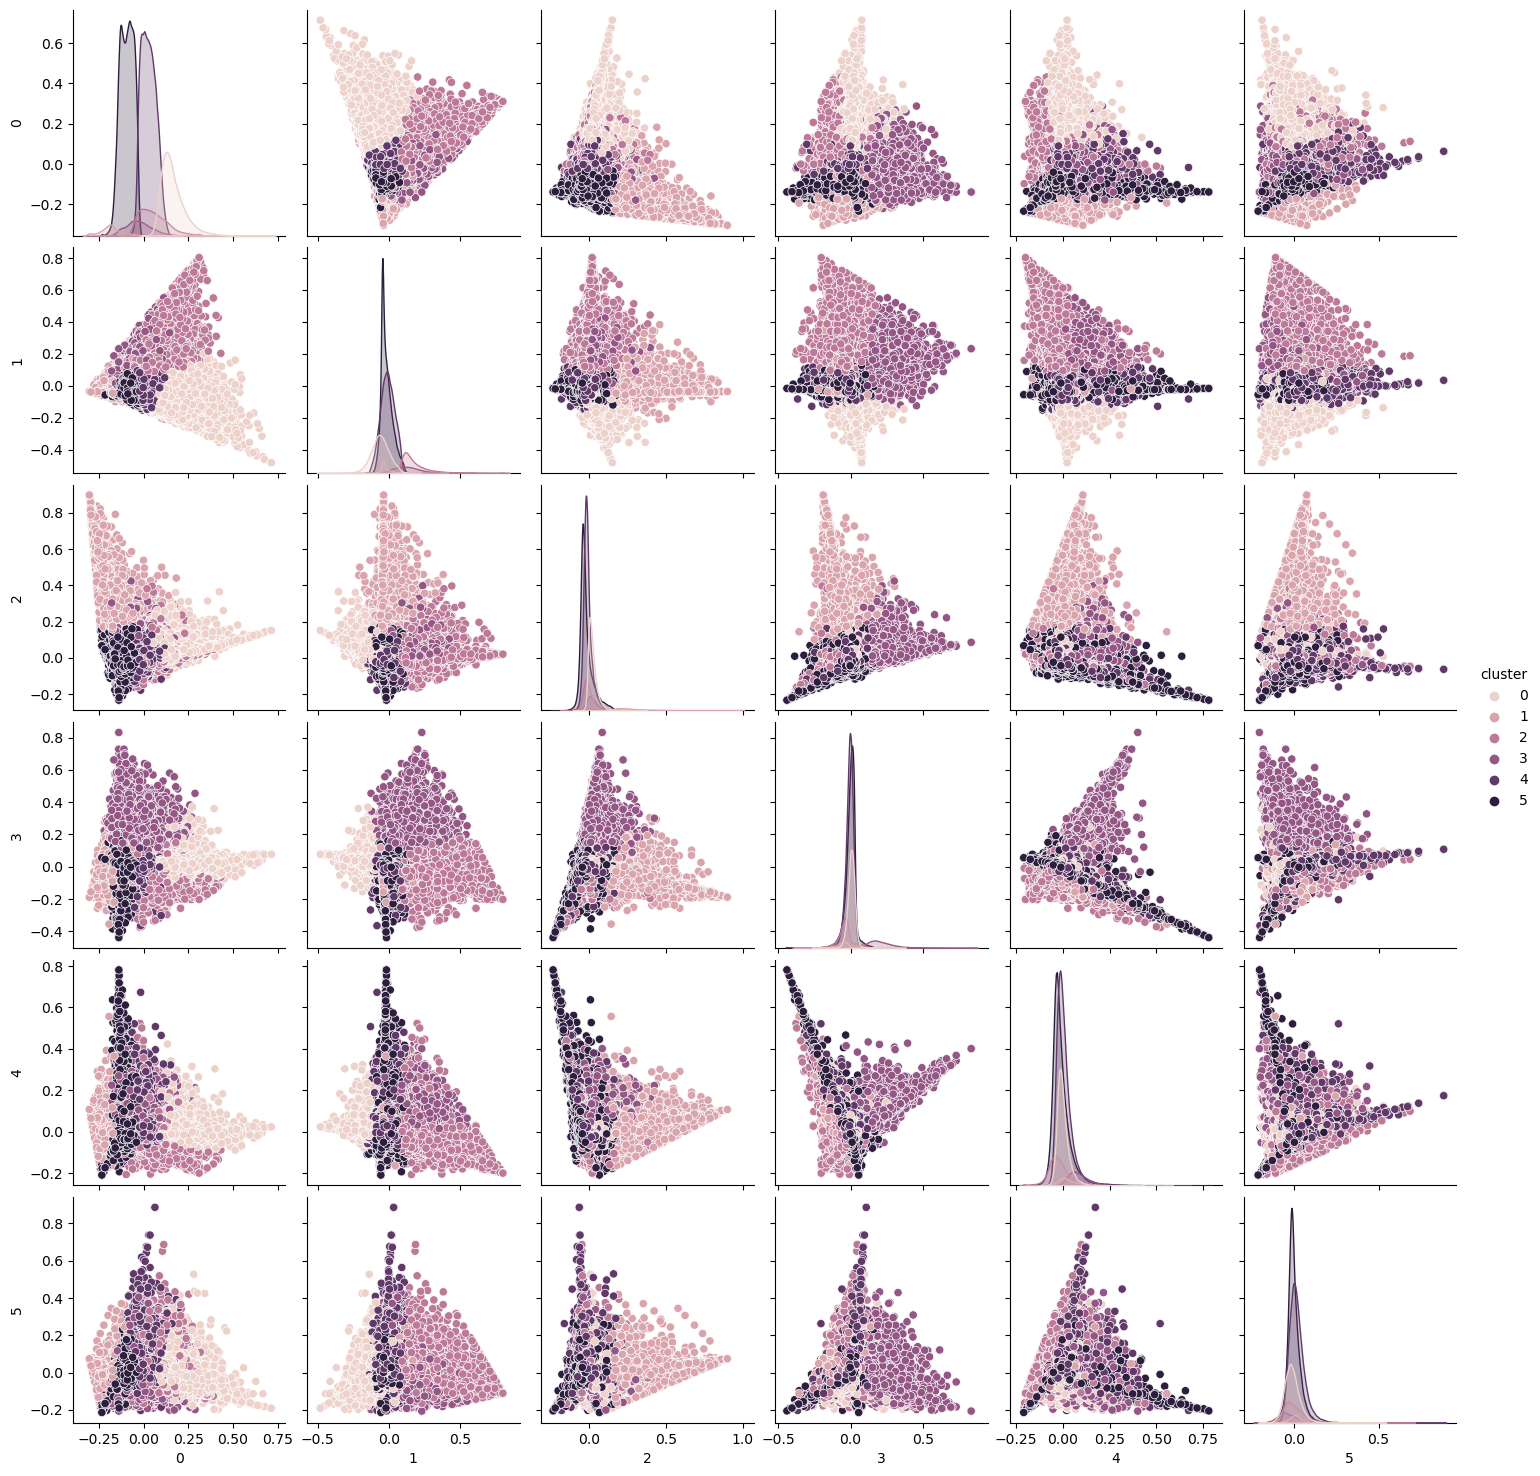

In [119]:
sns.pairplot(cluster_df, hue = 'cluster')

In [120]:
cluster_df = pd.concat([pd.Series(aisle_share_pivot.index),cluster_df],axis = 1)


In [121]:
cluster_df

,user_id,0,1,2,3,4,5,cluster
0,1,-0.103161,0.048617,-0.031836,-0.005638,-0.052998,-0.055309,5
1,2,-0.077766,0.077983,-0.076150,-0.101671,0.081782,-0.040423,5
2,3,0.057496,0.085719,0.001779,-0.013190,-0.028506,0.113080,4
3,4,-0.055343,0.134731,-0.002393,-0.037706,-0.087800,-0.027367,2
4,5,0.133936,-0.019591,-0.020961,-0.003731,0.057733,0.138870,4
...,...,...,...,...,...,...,...,...
206204,206205,-0.021674,0.081783,-0.073479,-0.088437,0.155956,-0.022710,4
206205,206206,-0.040315,-0.036658,-0.024050,0.010060,-0.051011,0.000803,5
206206,206207,-0.022110,-0.032613,-0.009469,-0.015801,0.021487,0.020454,4
206207,206208,-0.002217,-0.010633,-0.037621,-0.007751,0.028734,0.044825,4


# Cluster analysis

In [122]:
#These lines merge the aisle_hist DataFrame with a cluster_df DataFrame on the user_id column. The cluster_df likely contains user clustering information (e.g., from a clustering algorithm like K-Means). 
cluster_aisle_br = aisle_hist.merge(cluster_df[['user_id','cluster']], on = 'user_id')

In [123]:
#The column aisle_share is then renamed to user_aisle_share.
cluster_aisle_br = cluster_aisle_br.rename(columns = {'aisle_share':'user_aisle_share'})

In [124]:
aisle_hist = aisle_hist.merge(cluster_df[['user_id','cluster']], on = 'user_id')
aisle_hist = aisle_hist.rename(columns = {'aisle_share':'user_aisle_share'})

In [126]:
dept_hist = dept_hist.merge(cluster_df[['user_id','cluster']], on = 'user_id')
dept_hist = dept_hist.rename(columns = {'dept_share':'user_dept_share'})

In [127]:
#This line initializes an empty DataFrame cluster_aisle_br with specified columns.
cluster_aisle_br = pd.DataFrame(columns = ['aisle','add_to_cart_order','aisle_share','cluster'])
for i in range(0,6):
    x = aisle_hist[aisle_hist['cluster'] == i]
    x = x.groupby('aisle')['add_to_cart_order'].sum().reset_index()
    x['aisle_share'] = x['add_to_cart_order']
    x['aisle_share'] = x['aisle_share'].apply(lambda f: f / x['add_to_cart_order'].sum())
    x['cluster'] = i
    cluster_aisle_br = pd.concat([x,cluster_aisle_br], axis = 0)

The above loop iterates over clusters (assuming 6 clusters: 0 to 5). For each cluster:

It filters aisle_hist for that cluster.
Groups by aisle and sums add_to_cart_order.
Calculates the share of each aisle in the total orders of the cluster.
Adds the cluster identifier.
Concatenates these results to cluster_aisle_br.

# Creating Heatmaps for Top Aisles and Departments in Clusters

In [128]:
#Identify the top 20 and top 30 aisles based on total add_to_cart_order.
t20 = list(aisle_hist.groupby('aisle')['add_to_cart_order'].sum().sort_values(ascending = False)[0:20].index)
t30 = list(aisle_hist.groupby('aisle')['add_to_cart_order'].sum().sort_values(ascending = False)[0:30].index)

/var/folders/x_/4jbjgtwd0_d62lts4ntgyd6r0000gn/T/ipykernel_11215/1353712198.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  aisle_heat = aisle_heat.pivot(index = 'aisle', columns = 'cluster', values = 'aisle_share')


<Axes: xlabel='cluster', ylabel='aisle'>

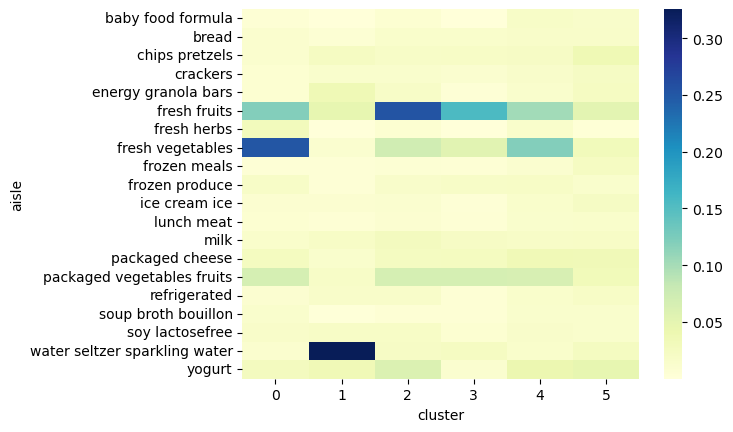

In [129]:
#filter cluster_aisle_br for the top 20 aisles.
#Pivot this data to prepare for a heatmap, where aisles are the rows, clusters are the columns, and aisle_share are the values.
aisle_heat = cluster_aisle_br[cluster_aisle_br['aisle'].isin(t20)]
aisle_heat = aisle_heat.pivot(index = 'aisle', columns = 'cluster', values = 'aisle_share')
sns.heatmap(aisle_heat,cmap="YlGnBu")

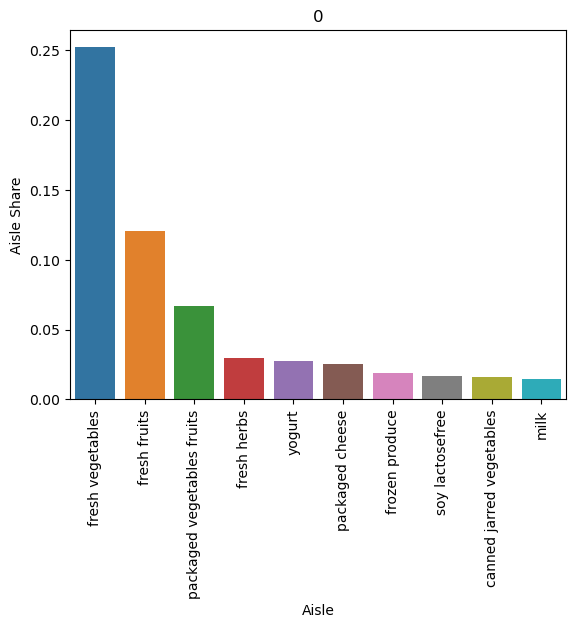

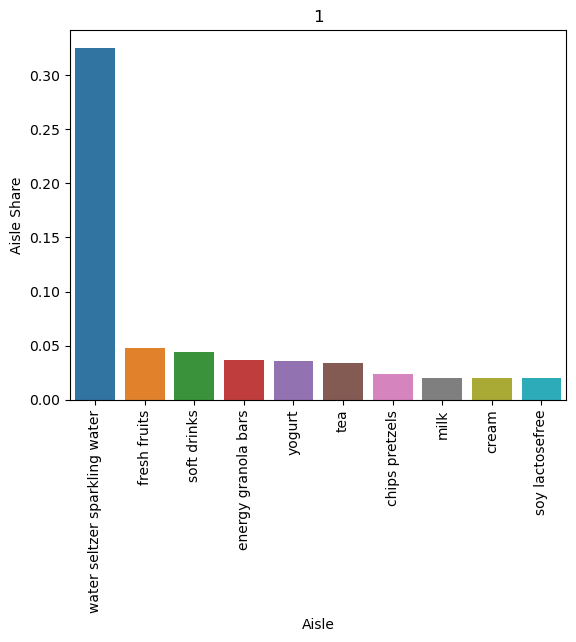

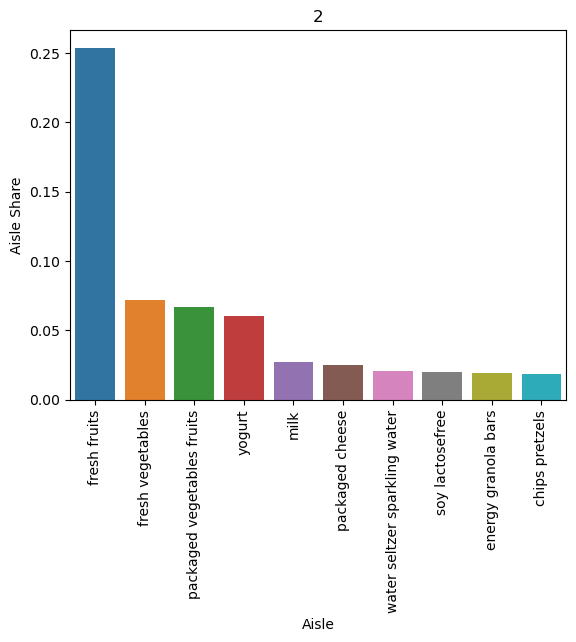

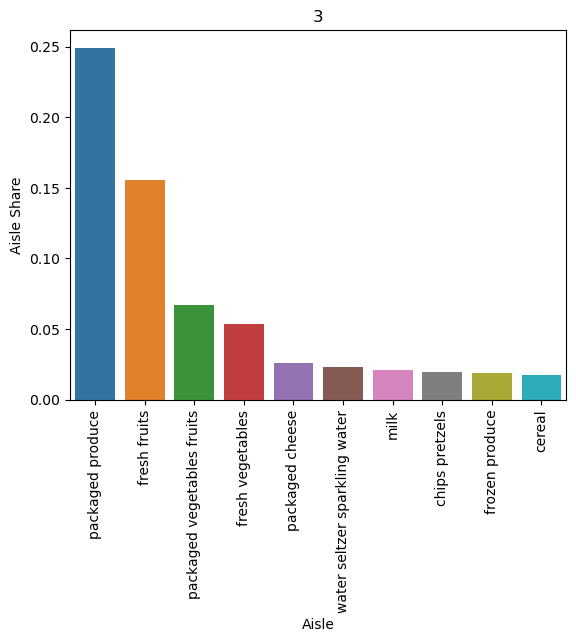

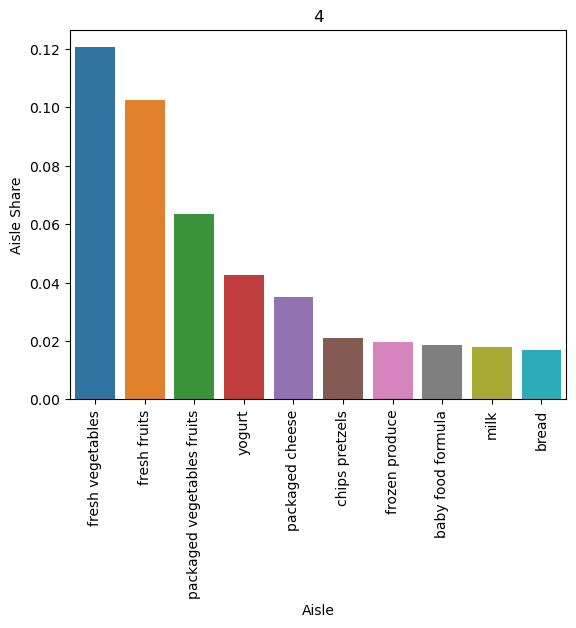

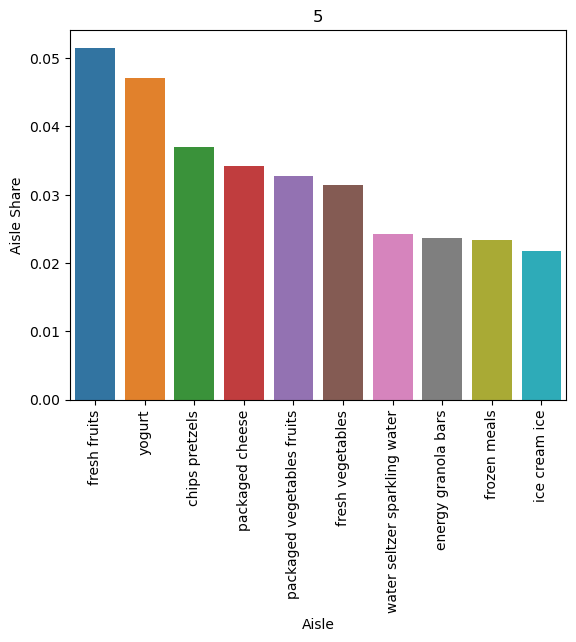

<Figure size 640x480 with 0 Axes>

In [130]:
for i in range(0,6):
    x = sns.barplot(data = cluster_aisle_br[cluster_aisle_br['cluster'] == i].sort_values('aisle_share', ascending = False)[0:10], x = 'aisle', y = 'aisle_share')
    x.set_xticklabels(x.get_xticklabels(), rotation=90)
    plt.title(str(i))
    x.set(xlabel = 'Aisle', ylabel = 'Aisle Share')
    plt.figure()

This loop creates bar plots for each cluster (0 to 5). For each cluster:

It filters cluster_aisle_br for the specific cluster and sorts by aisle_share.
Creates a bar plot for the top 10 aisles in that cluster.
Rotates the x-axis labels for readability.
Sets the plot title to the cluster number.

In [133]:
cluster_dept_br = pd.DataFrame(columns = ['department','add_to_cart_order','dept_share','cluster'])
for i in range(0,6):
    x = dept_hist[dept_hist['cluster_x'] == i]
    x = x.groupby('department')['add_to_cart_order'].sum().reset_index()
    x['dept_share'] = x['add_to_cart_order']
    x['dept_share'] = x['dept_share'].apply(lambda f: f / x['add_to_cart_order'].sum())
    x['cluster'] = i
    cluster_dept_br = pd.concat([x,cluster_dept_br], axis = 0)

In [134]:
cluster_dept_br[cluster_dept_br['cluster'] == 5].dept_share.sum()

1.0

/var/folders/x_/4jbjgtwd0_d62lts4ntgyd6r0000gn/T/ipykernel_11215/1163084534.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dept_heat = cluster_dept_br.pivot(index = 'department', columns = 'cluster', values = 'dept_share')


<Axes: xlabel='cluster', ylabel='department'>

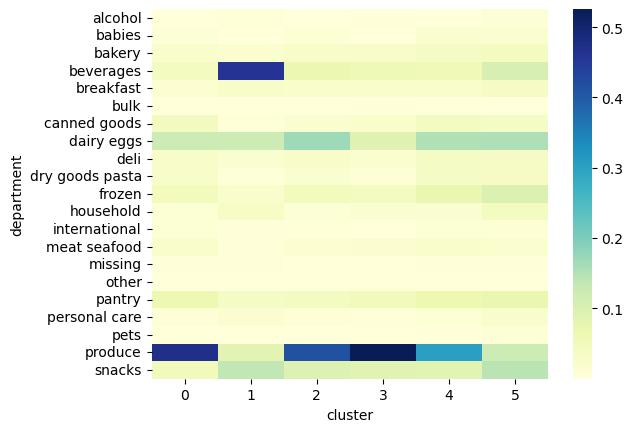

In [147]:
dept_heat = cluster_dept_br.pivot(index = 'department', columns = 'cluster', values = 'dept_share')
sns.heatmap(dept_heat,cmap="YlGnBu")

These lines repeat a similar process for departments:

Initialize a new DataFrame cluster_dept_br.
For each cluster, calculate the sum of add_to_cart_order by department.
Calculate the department share within each cluster.
Concatenate these results to cluster_dept_br.
Create a pivot table for a heatmap and plot it.

This series of steps is for analyzing and visualizing user purchase behaviors within different clusters based on aisle and department data, revealing patterns and preferences across different user segments.

In [136]:
cluster_dept_br

,department,add_to_cart_order,dept_share,cluster
0,alcohol,608663,0.007192,5
1,babies,1500782,0.017733,5
2,bakery,3556659,0.042024,5
3,beverages,8705307,0.102858,5
4,breakfast,2917081,0.034467,5
...,...,...,...,...
16,pantry,2919509,0.065235,0
17,personal care,366874,0.008198,0
18,pets,33225,0.000742,0
19,produce,21059879,0.470574,0


In [137]:
pd.DataFrame(cluster_df['cluster'].value_counts().reset_index())

,index,cluster
0,5,73898
1,4,72551
2,0,32528
3,2,15467
4,3,7947
5,1,3818


In [138]:
cluster_df['cluster'].value_counts().sort_index() / cluster_df['cluster'].value_counts().sum() * 100

0    15.774287
1     1.851520
2     7.500643
3     3.853857
4    35.183236
5    35.836457
Name: cluster, dtype: float64

This counts the number of occurrences of each cluster (as defined in the cluster column of cluster_df) and sorts these counts based on the cluster index.
The result is then divided by the total number of users to get the proportion of users in each cluster.
Multiplying by 100 converts this proportion into a percentage.

In [139]:
cluster_aisle_br.groupby('cluster')['add_to_cart_order'].sum() / cluster_aisle_br['add_to_cart_order'].sum() * 10

cluster
0    1.581457
1    0.036202
2    0.370884
3    0.078487
4    4.942257
5    2.990714
Name: add_to_cart_order, dtype: object

This sums the add_to_cart_order values for each cluster in the cluster_aisle_br DataFrame.
This sum is then divided by the total sum of add_to_cart_order across all clusters to get the proportion of total unit purchases that each cluster represents.
Multiplying by 100 converts this proportion into a percentage.

In [140]:
#calculating the proportion of the total user base that each cluster represents.
x = pd.concat([cluster_df['cluster'].value_counts().sort_index() / cluster_df['cluster'].value_counts().sum() * 100,cluster_aisle_br.groupby('cluster')['add_to_cart_order'].sum() / cluster_aisle_br['add_to_cart_order'].sum() * 100], axis = 1)
x.rename(columns = {'cluster':'User Share','add_to_cart_order':'Unit Purchase Share'})

,User Share,Unit Purchase Share
0,15.774287,15.814567
1,1.851520,0.362019
2,7.500643,3.708844
3,3.853857,0.784865
4,35.183236,49.422567
5,35.836457,29.907137


This is used to concatenate the results of the two previous calculations into a single DataFrame, x.
The first column of x will represent the user share of each cluster (percentage of total users in each cluster), and the second column will represent the unit purchase share of each cluster (percentage of total units purchased by each cluster).

In [141]:
cluster_df.head()

,user_id,0,1,2,3,4,5,cluster
0,1,-0.103161,0.048617,-0.031836,-0.005638,-0.052998,-0.055309,5
1,2,-0.077766,0.077983,-0.076150,-0.101671,0.081782,-0.040423,5
2,3,0.057496,0.085719,0.001779,-0.013190,-0.028506,0.113080,4
3,4,-0.055343,0.134731,-0.002393,-0.037706,-0.087800,-0.027367,2
4,5,0.133936,-0.019591,-0.020961,-0.003731,0.057733,0.138870,4


In [142]:
cluster_aisle_br

,aisle,add_to_cart_order,aisle_share,cluster
0,air fresheners candles,119287,0.001409,5
1,asian foods,445369,0.005262,5
2,baby accessories,23365,0.000276,5
3,baby bath body care,37571,0.000444,5
4,baby food formula,1325019,0.015656,5
...,...,...,...,...
129,trash bags liners,20570,0.000460,0
130,vitamins supplements,53311,0.001191,0
131,water seltzer sparkling water,557226,0.012451,0
132,white wines,4607,0.000103,0


In [143]:
all_orders = all_orders.merge(cluster_df[['user_id','cluster']], on = 'user_id')

This step is likely intended to add cluster information to each order in all_orders, thus allowing for analysis of orders based on the clusters to which users belong.

In [144]:
all_orders

,order_id,add_to_cart_order,reordered,order_hour_of_day,product_id,product_name,aisle_id,aisle,department_id,department,user_id,cluster
0,2,1,1,9,33120,Organic Egg Whites,86,eggs,16,dairy eggs,202279,4
1,104690,2,1,10,33120,Organic Egg Whites,86,eggs,16,dairy eggs,202279,4
2,132412,1,1,9,33120,Organic Egg Whites,86,eggs,16,dairy eggs,202279,4
3,2808715,1,1,13,33120,Organic Egg Whites,86,eggs,16,dairy eggs,202279,4
4,2894949,5,0,9,33120,Organic Egg Whites,86,eggs,16,dairy eggs,202279,4
...,...,...,...,...,...,...,...,...,...,...,...,...
33819101,3308056,1,1,20,19675,Organic Raspberry Black Tea,94,tea,7,beverages,106143,5
33819102,276317,1,1,15,47210,Fresh Farmed Tilapia Fillet,15,packaged seafood,12,meat seafood,66343,5
33819103,484769,1,0,11,47210,Fresh Farmed Tilapia Fillet,15,packaged seafood,12,meat seafood,66343,5
33819104,1561557,1,1,11,47210,Fresh Farmed Tilapia Fillet,15,packaged seafood,12,meat seafood,66343,5


In [145]:
# cluster_df.to_csv('cluster_df')

In [146]:
# all_orders.to_csv('all_orders.csv')

# Association rules

In [150]:
orders = all_orders.sort_values(['order_id','product_id'])
orders

,order_id,add_to_cart_order,reordered,order_hour_of_day,product_id,product_name,aisle_id,aisle,department_id,department,user_id,cluster
25120452,1,3,0,10,10246,Organic Celery Hearts,83,fresh vegetables,4,produce,112108,4
25120461,1,2,1,10,11109,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,other creams cheeses,16,dairy eggs,112108,4
25120451,1,6,0,10,13176,Bag of Organic Bananas,24,fresh fruits,4,produce,112108,4
25120445,1,8,1,10,22035,Organic Whole String Cheese,21,packaged cheese,16,dairy eggs,112108,4
25120465,1,5,1,10,43633,Lightly Smoked Sardines in Olive Oil,95,canned meat seafood,15,canned goods,112108,4
...,...,...,...,...,...,...,...,...,...,...,...,...
23371497,3421083,3,0,6,21162,Organic Mixed Berry Yogurt & Fruit Snack,92,baby food formula,18,babies,25247,4
23371323,3421083,9,1,6,24852,Banana,24,fresh fruits,4,produce,25247,4
23371560,3421083,5,0,6,35211,Organic Strawberry & Mango Dried Tiny Fruits,92,baby food formula,18,babies,25247,4
23371484,3421083,6,1,6,39678,Free & Clear Natural Dishwasher Detergent,74,dish detergents,17,household,25247,4


In [155]:
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
from itertools import combinations, groupby
from collections import Counter

# Returns frequency counts for items and item pairs
def freq(iterable):
    if type(iterable) == pd.core.series.Series:
        return iterable.value_counts().rename("freq")
    else: 
        return pd.Series(Counter(iterable)).rename("freq")

    
# Returns number of unique orders
def order_count(order_item):
    return len(set(order_item.index))


# Returns generator that yields item pairs, one at a time
def get_item_pairs(order_item):
    order_item = order_item.reset_index().to_numpy()
    for order_id, order_object in groupby(order_item, lambda x: x[0]):
        item_list = [item[1] for item in order_object]
              
        for item_pair in combinations(item_list, 2):
            yield item_pair
            

# Returns frequency and support associated with item
def merge_item_stats(item_pairs, item_stats):
    return (item_pairs
                .merge(item_stats.rename(columns={'freq': 'freqA', 'support': 'supportA'}), left_on='item_A', right_index=True)
                .merge(item_stats.rename(columns={'freq': 'freqB', 'support': 'supportB'}), left_on='item_B', right_index=True))


# Returns name associated with item
def merge_item_name(rules, item_name):
    columns = ['itemA','itemB','freqAB','supportAB','freqA','supportA','freqB','supportB', 
               'confidenceAtoB','confidenceBtoA','lift']
    rules = (rules
                .merge(item_name.rename(columns={'item_name': 'itemA'}), left_on='item_A', right_on='item_id')
                .merge(item_name.rename(columns={'item_name': 'itemB'}), left_on='item_B', right_on='item_id'))

In [152]:
def association_rules(order_item, min_support):

    print("Starting order_item: {:22d}".format(len(order_item)))


    # Calculate item frequency and support
    item_stats             = freq(order_item).to_frame("freq")
    item_stats['support']  = item_stats['freq'] / order_count(order_item) 


    # Filter from order_item items below min support 
    qualifying_items       = item_stats[item_stats['support'] >= min_support].index
    order_item             = order_item[order_item.isin(qualifying_items)]

    print("Items with support >= {}: {:15d}".format(min_support, len(qualifying_items)))
    print("Remaining order_item: {:21d}".format(len(order_item)))


    # Filter from order_item orders with less than 2 items
    order_size             = freq(order_item.index)
    qualifying_orders      = order_size[order_size >= 2].index
    order_item             = order_item[order_item.index.isin(qualifying_orders)]

    print("Remaining orders with 2+ items: {:11d}".format(len(qualifying_orders)))
    print("Remaining order_item: {:21d}".format(len(order_item)))


    # Recalculate item frequency and support
    item_stats             = freq(order_item).to_frame("freq")
    item_stats['support']  = item_stats['freq'] / order_count(order_item) 


    # Get item pairs generator
    item_pair_gen          = get_item_pairs(order_item)


    # Calculate item pair frequency and support
    item_pairs              = freq(item_pair_gen).to_frame("freqAB")
    item_pairs['supportAB'] = item_pairs['freqAB'] / len(qualifying_orders)

    print("Item pairs: {:31d}".format(len(item_pairs)))


    # Filter from item_pairs those below min support
    item_pairs              = item_pairs[item_pairs['supportAB'] >= min_support]

    print("Item pairs with support >= {}: {:10d}\n".format(min_support, len(item_pairs)))


    # Create table of association rules and compute relevant metrics
    item_pairs = item_pairs.reset_index().rename(columns={'level_0': 'item_A', 'level_1': 'item_B'})
    item_pairs = merge_item_stats(item_pairs, item_stats)
    
    item_pairs['confidenceAtoB'] = item_pairs['supportAB'] / item_pairs['supportA']
    item_pairs['confidenceBtoA'] = item_pairs['supportAB'] / item_pairs['supportB']
    item_pairs['lift']           = item_pairs['supportAB'] / (item_pairs['supportA'] * item_pairs['supportB'])
    
    
    # Return association rules sorted by lift in descending order
    return item_pairs.sort_values('lift', ascending=False)

In [156]:
# separate order data by cluster and transform into expected format of group association function

cluster_orders = {}
for x in range(0,6):
    i = orders[orders['cluster'] == x]
    i = i.set_index('order_id')['product_id'].rename('item_id')
    cluster_orders[x] = i

In [157]:
# run each cluster series through association rule function and obtain association rules at item level

group_association_rules_dic = {}
for x in range(0,6):
    group_association_rules_dic[x] = association_rules(cluster_orders[x],.0001)

Starting order_item:                5576986
Items with support >= 0.0001:            7481
Remaining order_item:               5300829
Remaining orders with 2+ items:      506419
Remaining order_item:               5282284
Item pairs:                         4969306
Item pairs with support >= 0.0001:      91392

Starting order_item:                 218347
Items with support >= 0.0001:            4760
Remaining order_item:                203034
Remaining orders with 2+ items:       37305
Remaining order_item:                191853
Item pairs:                          218123
Item pairs with support >= 0.0001:      35444

Starting order_item:                1753194
Items with support >= 0.0001:            6118
Remaining order_item:               1640858
Remaining orders with 2+ items:      226422
Remaining order_item:               1618518
Item pairs:                         1640144
Item pairs with support >= 0.0001:      45887

Starting order_item:                 541231
Items with suppor

In [158]:
# format item association rule dataframes and merge product names

for x in group_association_rules_dic:
    group_association_rules_dic[x] = group_association_rules_dic[x].merge(products[['product_id','product_name']]
               .rename(columns = {'product_id':'item_A','product_name':'product_name_A'}), on = 'item_A')
    group_association_rules_dic[x] = group_association_rules_dic[x].merge(products[['product_id','product_name']]
               .rename(columns = {'product_id':'item_B','product_name':'product_name_B'}), on = 'item_B')
    group_association_rules_dic[x] = group_association_rules_dic[x][['item_A','item_B','product_name_A',
                                                                    'product_name_B','freqAB','supportAB','freqA',
                                                                    'supportA','freqB','supportB','confidenceAtoB',
                                                                    'confidenceBtoA','lift']]
    

In [159]:
# example of association rule dataframe

x = group_association_rules_dic[5]
x.sort_values('lift', ascending = False)

,item_A,item_B,product_name_A,product_name_B,freqAB,supportAB,freqA,supportA,freqB,supportB,confidenceAtoB,confidenceBtoA,lift
0,4376,44396,Coconut Kale & Cacao Organic Superfoods Bar,Organic Hazelnut Hemp Cacao Superfoods Bar,102,0.000102,221,0.000222,192,0.000192,0.461538,0.531250,2397.987981
1,15697,35208,Apricot Walnut & Coconut Granola Bar,"Granola Bar, Fig, Cranberry & Hazelnut",132,0.000132,226,0.000227,252,0.000253,0.584071,0.523810,2312.092920
6,11224,39739,Organic Cashew Nondairy Blueberry Yogurt,Organic Nondairy Strawberry Cashew Yogurt,139,0.000139,208,0.000209,302,0.000303,0.668269,0.460265,2207.419400
8,29126,36361,Organic Strawberry Chia Lowfat 2% Cottage Cheese,Organic Cottage Cheese Blueberry Acai Chia,145,0.000145,301,0.000302,220,0.000221,0.481728,0.659091,2184.334567
9,3858,15692,2nd Foods Chicken & Gravy,2nd Foods Turkey Meat,158,0.000158,373,0.000374,201,0.000201,0.423592,0.786070,2102.289544
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8473,21903,23909,Organic Baby Spinach,2% Reduced Fat Milk,103,0.000103,19760,0.019808,23939,0.023997,0.005213,0.004303,0.217212
217,196,21137,Soda,Organic Strawberries,154,0.000154,22847,0.022903,31236,0.031312,0.006740,0.004930,0.215267
3943,23909,47209,2% Reduced Fat Milk,Organic Hass Avocado,111,0.000111,23939,0.023997,22921,0.022977,0.004637,0.004843,0.201801
280,16797,21137,Strawberries,Organic Strawberries,160,0.000160,33108,0.033189,31236,0.031312,0.004833,0.005122,0.154338


In [160]:
# separate order data by cluster and transform into expected format of group association function at aisle level

cluster_aisle_orders = {}
for x in range(0,6):
    i = orders[orders['cluster'] == x]
    i = i.groupby(['order_id','aisle_id'])['product_id'].count().reset_index().set_index('order_id')['aisle_id'].rename('item_id')
    cluster_aisle_orders[x] = i

In [161]:
orders.groupby(['order_id','aisle_id'])['product_id'].count().reset_index().set_index('order_id')['aisle_id'].rename('item_id')


order_id
1           21
1           24
1           83
1           95
1          108
          ... 
3421083     52
3421083     74
3421083     78
3421083     92
3421083    117
Name: item_id, Length: 24329222, dtype: int64

In [162]:
orders[orders['cluster'] == 5]['order_id'].nunique()

1081913

In [163]:
# run association function at aisle level

group_aisle_association_rules_dic = {}
for x in range(0,6):
    group_aisle_association_rules_dic[x] = association_rules(cluster_aisle_orders[x],.0001)

Starting order_item:                3649449
Items with support >= 0.0001:             134
Remaining order_item:               3649449
Remaining orders with 2+ items:      506974
Remaining order_item:               3629295
Item pairs:                            8837
Item pairs with support >= 0.0001:       6227

Starting order_item:                 141823
Items with support >= 0.0001:             134
Remaining order_item:                141823
Remaining orders with 2+ items:       34216
Remaining order_item:                127103
Item pairs:                            6629
Item pairs with support >= 0.0001:       4156

Starting order_item:                1193246
Items with support >= 0.0001:             134
Remaining order_item:               1193246
Remaining orders with 2+ items:      220994
Remaining order_item:               1163698
Item pairs:                            8555
Item pairs with support >= 0.0001:       5357

Starting order_item:                 417338
Items with suppor

In [164]:
# reformat cluster aisle assocation dataframes

for x in group_aisle_association_rules_dic:
    group_aisle_association_rules_dic[x] = group_aisle_association_rules_dic[x].merge(aisles[['aisle_id','aisle']]
               .rename(columns = {'aisle_id':'item_A','aisle':'aisle_name_A'}), on = 'item_A')
    group_aisle_association_rules_dic[x] = group_aisle_association_rules_dic[x].merge(aisles[['aisle_id','aisle']]
               .rename(columns = {'aisle_id':'item_B','aisle':'aisle_name_B'}), on = 'item_B')
    group_aisle_association_rules_dic[x] = group_aisle_association_rules_dic[x][['item_A','item_B','aisle_name_A',
                                                                    'aisle_name_B','freqAB','supportAB','freqA',
                                                                    'supportA','freqB','supportB','confidenceAtoB',
                                                                    'confidenceBtoA','lift']]
    group_aisle_association_rules_dic[x] = group_aisle_association_rules_dic[x].rename(columns = {'item_A':'aisle_A','item_B':'aisle_B'})

In [165]:
x = group_aisle_association_rules_dic[5].sort_values('lift',ascending = False)
x.sort_values('lift',ascending = False)

,aisle_A,aisle_B,aisle_name_A,aisle_name_B,freqAB,supportAB,freqA,supportA,freqB,supportB,confidenceAtoB,confidenceBtoA,lift
0,28,62,red wines,white wines,5794,0.005813,16460,0.016515,17320,0.017378,0.352005,0.334527,20.255522
55,28,134,red wines,specialty wines champagnes,1602,0.001607,16460,0.016515,6561,0.006583,0.097327,0.244170,14.784455
56,62,134,white wines,specialty wines champagnes,1643,0.001649,17320,0.017378,6561,0.006583,0.094861,0.250419,14.409945
6928,25,109,soap,skin care,592,0.000594,16142,0.016196,2808,0.002817,0.036675,0.210826,13.016971
7679,27,28,beers coolers,red wines,4228,0.004242,20495,0.020564,16460,0.016515,0.206294,0.256865,12.491077
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,57,62,granola,white wines,170,0.000171,31148,0.031253,17320,0.017378,0.005458,0.009815,0.314061
201,50,124,fruit vegetable snacks,spirits,288,0.000289,59925,0.060126,16022,0.016076,0.004806,0.017975,0.298958
171,42,124,frozen vegan vegetarian,spirits,127,0.000127,27312,0.027404,16022,0.016076,0.004650,0.007927,0.289252
165,92,124,baby food formula,spirits,169,0.000170,44413,0.044562,16022,0.016076,0.003805,0.010548,0.236702


In [166]:
cluster_df['cluster'].value_counts() / cluster_df['cluster'].value_counts().sum()

5    0.358365
4    0.351832
0    0.157743
2    0.075006
3    0.038539
1    0.018515
Name: cluster, dtype: float64

In [167]:
for x in group_association_rules_dic:
   group_association_rules_dic[x].to_csv('group'+str(x)+'_item_rules.csv')

In [168]:
for x in group_aisle_association_rules_dic:
    group_aisle_association_rules_dic[x].to_csv('group'+str(x)+'_aisle_rules.csv')

In [170]:
group_aisle_association_rules_dic

{0:       aisle_A  aisle_B        aisle_name_A  aisle_name_B  freqAB  supportAB  \
 0          28       62           red wines   white wines     157   0.000310   
 1          27       62       beers coolers   white wines      82   0.000162   
 2          54       62         paper goods   white wines      87   0.000172   
 3          17       62  baking ingredients   white wines      60   0.000118   
 4          26       62              coffee   white wines      63   0.000124   
 ...       ...      ...                 ...           ...     ...        ...   
 6222       83      113    fresh vegetables  frozen juice     206   0.000406   
 6223       21       44     packaged cheese  eye ear care      70   0.000138   
 6224       16       44         fresh herbs  eye ear care      64   0.000126   
 6225       24       44        fresh fruits  eye ear care     206   0.000406   
 6226       24       73        fresh fruits   facial care     113   0.000223   
 
        freqA  supportA  freqB  sup

# Recommendation System

In [171]:
from itertools import combinations, groupby, chain

In [172]:
cluster0_item_rules = pd.read_csv('group0_item_rules.csv', index_col = 0)
cluster1_item_rules = pd.read_csv('group1_item_rules.csv', index_col = 0)
cluster2_item_rules = pd.read_csv('group2_item_rules.csv', index_col = 0)
cluster3_item_rules = pd.read_csv('group3_item_rules.csv', index_col = 0)
cluster4_item_rules = pd.read_csv('group4_item_rules.csv', index_col = 0)
cluster5_item_rules = pd.read_csv('group5_item_rules.csv', index_col = 0)
cluster0_aisle_rules = pd.read_csv('group0_aisle_rules.csv', index_col = 0)
cluster1_aisle_rules = pd.read_csv('group1_aisle_rules.csv', index_col = 0)
cluster2_aisle_rules = pd.read_csv('group2_aisle_rules.csv', index_col = 0)
cluster3_aisle_rules = pd.read_csv('group3_aisle_rules.csv', index_col = 0)
cluster4_aisle_rules = pd.read_csv('group4_aisle_rules.csv', index_col = 0)
cluster5_aisle_rules = pd.read_csv('group5_aisle_rules.csv', index_col = 0)

In [174]:
cluster_df = clusters.set_index('user_id')
cluster_df

,0,1,2,3,4,5,cluster
user_id,,,,,,,
1,-0.103161,0.048617,-0.031836,-0.005638,-0.052998,-0.055309,5
2,-0.077766,0.077983,-0.076150,-0.101671,0.081782,-0.040423,5
3,0.057496,0.085719,0.001779,-0.013190,-0.028506,0.113080,4
4,-0.055343,0.134731,-0.002393,-0.037706,-0.087800,-0.027367,2
5,0.133936,-0.019591,-0.020961,-0.003731,0.057733,0.138870,4
...,...,...,...,...,...,...,...
206205,-0.021674,0.081783,-0.073479,-0.088437,0.155956,-0.022710,4
206206,-0.040315,-0.036658,-0.024050,0.010060,-0.051011,0.000803,5
206207,-0.022110,-0.032613,-0.009469,-0.015801,0.021487,0.020454,4


In [175]:
cluster_item_rules_dic = {}
cluster_item_rules_dic[0] = cluster0_item_rules
cluster_item_rules_dic[1] = cluster1_item_rules
cluster_item_rules_dic[2] = cluster2_item_rules
cluster_item_rules_dic[3] = cluster3_item_rules
cluster_item_rules_dic[4] = cluster4_item_rules
cluster_item_rules_dic[5] = cluster5_item_rules

In [176]:
cluster_aisle_rules_dic = {}
cluster_aisle_rules_dic[0] = cluster0_aisle_rules
cluster_aisle_rules_dic[1] = cluster1_aisle_rules
cluster_aisle_rules_dic[2] = cluster2_aisle_rules
cluster_aisle_rules_dic[3] = cluster3_aisle_rules
cluster_aisle_rules_dic[4] = cluster4_aisle_rules
cluster_aisle_rules_dic[5] = cluster5_aisle_rules

In [177]:
# returns top x items associated based on lift

def product_to_product(cluster, product_id, item_lift, product_name, num_products):
    df = cluster_item_rules_dic[cluster]
    df = df[(df['item_A'] == product_id) | (df['item_B'] == product_id)][['product_name_A','item_A','product_name_B','item_B','confidenceAtoB','lift']].sort_values('lift', ascending = False)
    df = df[df['lift'] > item_lift]
    df = df.sort_values('lift', ascending = False)
    df = df.head(n = num_products)
    product_to_product_associations = df['product_name_A'].values.tolist()
    for x in df['product_name_B'].values.tolist():
        product_to_product_associations.append(x)
    product_to_product_associations = [x for x in product_to_product_associations if x != product_name]
    return product_to_product_associations

In [178]:
# returns recommended products given inputs

def pdp_recommender(user_id, product_id, item_lift, num_products):
    product_name = products.at[product_id,'product_name']
    aisle_id = products.at[product_id,'aisle_id']
    aisle_name = aisles.at[aisle_id,'aisle']
    cluster = cluster_df.at[user_id, 'cluster']
    print(cluster)
    return product_to_product(cluster = cluster, product_id = product_id, item_lift = item_lift, 
                              product_name = product_name, num_products = num_products)

In [186]:
# results for users in the 6 different clusters

users = [10000,2631,954,101,481,721]
i = 0
for x in users:
    print('cluster ' + str(i) + str(pdp_recommender(x,39055,1,5)))
    i = i + 1

4
cluster 0['Thin & Light Tortilla Chips', 'Organic Large Brown Grade AA Cage Free Eggs', 'Organic Reduced Fat 2% Milk', 'Organic Large Grade AA Brown Eggs', 'Thick & Crispy Tortilla Chips']
5
cluster 1['Real Guacamole', 'Thin & Light Tortilla Chips', 'Original Hummus', 'Organic Reduced Fat 2% Milk', 'Thick & Crispy Tortilla Chips']
4
cluster 2['Thin & Light Tortilla Chips', 'Organic Large Brown Grade AA Cage Free Eggs', 'Organic Reduced Fat 2% Milk', 'Organic Large Grade AA Brown Eggs', 'Thick & Crispy Tortilla Chips']
4
cluster 3['Thin & Light Tortilla Chips', 'Organic Large Brown Grade AA Cage Free Eggs', 'Organic Reduced Fat 2% Milk', 'Organic Large Grade AA Brown Eggs', 'Thick & Crispy Tortilla Chips']
0
cluster 4['Thin & Light Tortilla Chips', 'Red Peppers', 'Organic Lemon', 'Organic Grape Tomatoes', 'Organic Small Bunch Celery']
4
cluster 5['Thin & Light Tortilla Chips', 'Organic Large Brown Grade AA Cage Free Eggs', 'Organic Reduced Fat 2% Milk', 'Organic Large Grade AA Brown E